In [52]:
# Import
import cv2
import numpy as np

import matplotlib.pyplot as plt

!python -m pip install scikit-learn

from skimage.transform import hough_line, hough_line_peaks
from sklearn.metrics import pairwise_distances

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 4.5 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)


In [64]:

def calculate_right_angle_score(edges):
    # Detect lines using Hough transform
    h, theta, d = hough_line(edges)

    # Find peaks in the Hough transform
    _, angles, dists = hough_line_peaks(h, theta, d)

    # Calculate pairwise distances between angles
    pairwise_dists = pairwise_distances(angles[:, np.newaxis])

    # Calculate the right angle score
    right_angle_score = 1 - np.mean(pairwise_dists)

    return right_angle_score


255


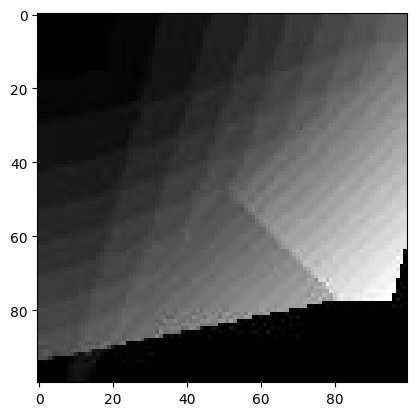

0.4764012244017011


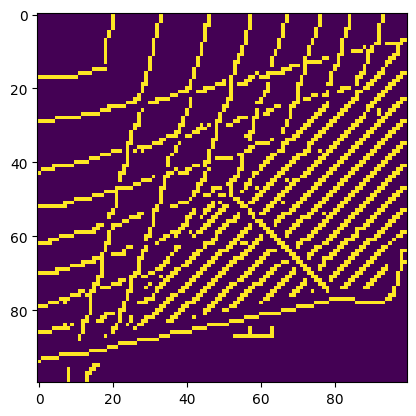

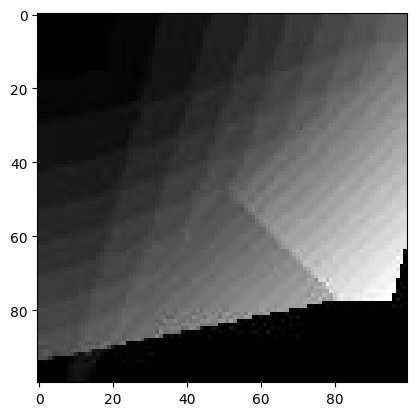

[[  1.02992052   0.94156148 -49.49883123]
 [  0.60963067  -0.5656849   59.2113137 ]]
0.05158808446628127


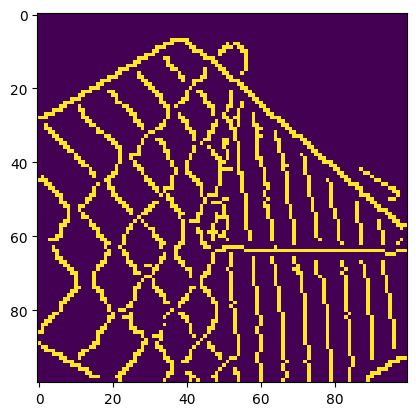

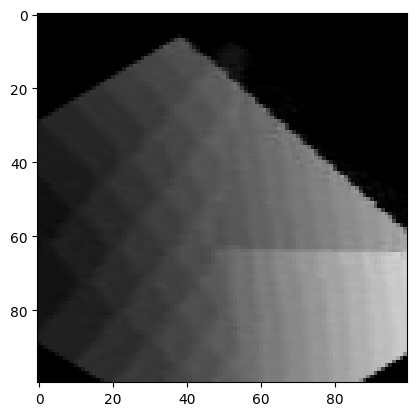

In [140]:
csd_image = "/Users/andrijapaurevic/Documents/uWaterloo/research/mainCSG/QuantumDotControl/autotuning/data/csd/processed/train/20171118-131209334790.jpg"

img = cv2.imread(csd_image)
plt.imshow(img)
print(np.amax(img))
plt.show()
# Blur the image for better edge detection

 
# # Sobel Edge Detection
# sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
# sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
# sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
# # Display Sobel Edge Detection Images
# plt.imshow(sobelx)
# plt.show()
# plt.imshow(sobely)
# plt.show()
# plt.imshow(sobelxy)
# plt.show()
 
# Canny Edge Detection
img_blur = cv2.GaussianBlur(img, (3,3), 0) 
edges = cv2.Canny(image=img_blur, threshold1=1, threshold2=20) # Canny Edge Detection
print(calculate_right_angle_score(edges))
plt.imshow(edges)
plt.show()
# Display Canny Edge Detection Image
plt.imshow(img)
plt.show()
# access the image height and width
rows,cols,_ = img.shape

# define at three point on input image
pts1 = np.random.randint(0, cols+1, size=(3, 2)).astype(np.float32)

# define three points corresponding location to output image
pts2 =np.random.randint(0, cols+1, size=(3, 2)).astype(np.float32)
# pts2 = np.array([[12, 35],[89, 91], [26., 74]]).astype(np.float32)
# print(pts2)
# get the affine transformation Matrix
M = cv2.getAffineTransform(pts1,pts2)
# M_good = np.array([[-0.8330292,  -0.24270073, 74.78193431], [ 0.19008516 , 0.97871046,  0.54227494]])
print(M)
# apply affine transformation on the input image
dst = cv2.warpAffine(img,M,(cols,rows))
img_blur = cv2.GaussianBlur(dst, (3,3), 0) 
edges = cv2.Canny(image=img_blur, threshold1=5, threshold2=20) # Canny Edge Detection

print(calculate_right_angle_score(edges))
plt.imshow(edges)
plt.show()
plt.imshow(dst)
plt.show()


0.21460183660255172
-0.19964671851365345


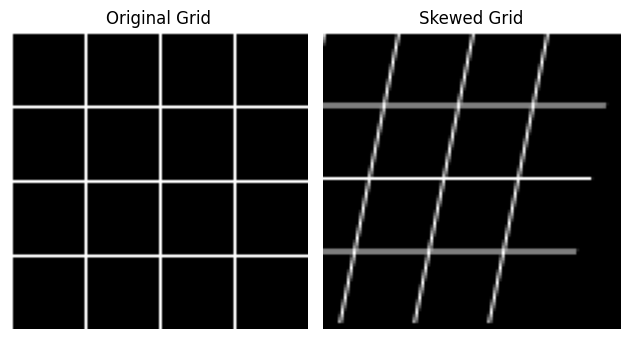

In [135]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import warp, AffineTransform

# Generate the initial grid of lines
grid = np.zeros((100, 100))
grid[::25, :] = 1
grid[:, ::25] = 1

# Create the affine transformation matrix for skewing
affine = AffineTransform(shear=0.2)

# Apply the affine transformation to the grid
skewed_grid = warp(grid, affine.inverse)


def calculate_right_angle_score(edges):
    # Detect lines using Hough transform
    h, theta, d = hough_line(edges)

    # Find peaks in the Hough transform
    _, angles, dists = hough_line_peaks(h, theta, d)

    # Calculate pairwise distances between angles
    pairwise_dists = pairwise_distances(angles[:, np.newaxis])

    # Calculate the right angle score
    right_angle_score = 1 - np.mean(pairwise_dists)

    return right_angle_score


print(calculate_right_angle_score(grid))
print(calculate_right_angle_score(skewed_grid))

# Display the original and skewed grids
plt.subplot(121)
plt.imshow(grid, cmap='gray')
plt.title("Original Grid")
plt.axis('off')

plt.subplot(122)
plt.imshow(skewed_grid, cmap='gray')
plt.title("Skewed Grid")
plt.axis('off')

plt.tight_layout()
plt.show()